## Question 1

You are provided with a `df.csv` file containing the number of sales (in millions of units) and the price for two products (**Product A** and **Product B**). Your task is to analyze this historical data and make a recommendation for the selling price of both products.


In [4]:
import pandas as pd

headers = ["Price_Product_A", "Sales_Product_A", "Price_Product_B", "Sales_Product_B"]
df = pd.read_csv('data.csv', skiprows=1, names=headers)
df['Price_Increment'] = df['Price_Product_B'] - df['Price_Product_A']

df

,Price_Product_A,Sales_Product_A,Price_Product_B,Sales_Product_B,Price_Increment
0,6.62,64.152047,6.75,54.512467,0.13
1,8.71,38.973806,12.67,0.000000,3.96
2,7.07,64.686109,9.91,31.309992,2.84
3,6.08,71.023195,5.42,66.603478,-0.66
4,5.94,69.913545,12.82,0.000000,6.88
...,...,...,...,...,...
895,NaN,NaN,12.12,0.000000,NaN
896,NaN,NaN,12.01,0.000000,NaN
897,NaN,NaN,13.80,0.000000,NaN
898,NaN,NaN,11.66,0.000000,NaN


## Dataset: Product Prices and Sales

| Price_Product_A | Sales_Product_A | Price_Product_B | Sales_Product_B | Price_Increment |
|-----------------|-----------------|-----------------|-----------------|-----------------|
| 6.62            | 64.152047        | 6.75            | 54.512467        | 0.13            |
| 8.71            | 38.973806        | 12.67           | 0.000000         | 3.96            |
| 7.07            | 64.686109        | 9.91            | 31.309992        | 2.84            |
| 6.08            | 71.023195        | 5.42            | 66.603478        | -0.66           |
| 5.94            | 69.913545        | 12.82           | 0.000000         | 6.88            |
| ...             | ...              | ...             | ...              | ...             |
| NaN             | NaN              | 12.12           | 0.000000         | NaN             |
| NaN             | NaN              | 12.01           | 0.000000         | NaN             |
| NaN             | NaN              | 13.80           | 0.000000         | NaN             |
| NaN             | NaN              | 11.66           | 0.000000         | NaN             |
| NaN             | NaN              | 8.20            | 47.593318        | NaN             |

**Note**: Some rows contain missing values, indicating missing data. We'll drop them off when fitting the model.


### A) Plot the DataFrame

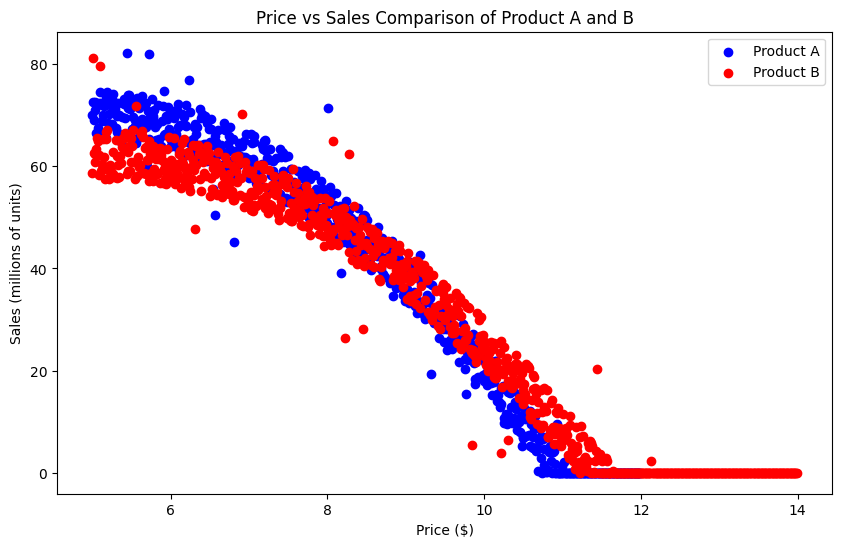

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price_Product_A'], df['Sales_Product_A'], color='blue', label='Product A')
plt.scatter(df['Price_Product_B'], df['Sales_Product_B'], color='red', label='Product B')

plt.title('Price vs Sales Comparison of Product A and B')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.legend()

plt.savefig('plot.png')

plt.show()


### b. Fit the DataFrame

In [5]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

df_clean = df.dropna()

X_A = df_clean[['Price_Product_A']]  # Input 
y_A = df_clean['Sales_Product_A']    # Target 

X_B = df_clean[['Price_Product_B']]  # Input 
y_B = df_clean['Sales_Product_B']    # Target 

model_A = LinearRegression()
model_A.fit(X_A, y_A)

model_B = LinearRegression()
model_B.fit(X_B, y_B)

# Output the coefficients and intercepts of the models for both products
model_A_coef = model_A.coef_
model_A_intercept = model_A.intercept_

model_B_coef = model_B.coef_
model_B_intercept = model_B.intercept_

model_A_coef, model_A_intercept, model_B_coef, model_B_intercept


(array([-12.37185324]),
 144.5465009860961,
 array([-9.11250047]),
 116.32625117161315)

(array([-12.37185324]),
 144.5465009860961,
 array([-9.10473545]),
 116.3775689056927)

### C) How would you determine the optimal selling price. 
What is your recommended price for each product?

## Product A:
Average Price: $8.50
- Optimal Selling Price $10.43

## Product B:
- Average Price: $9.50
- Optimal Selling Price $9.30

In this case, we're using the average price for simplicity


In [42]:

average_price_A = df['Price_Product_A'].mean()
average_price_B = df['Price_Product_B'].mean()

optimal_price_A = (average_price_A - model_A_coef) / 2
optimal_price_B = (average_price_B - model_B_coef) / 2

(8.495, 9.495, 10.433426621711455, 9.299867727315185)

(8.495, 9.495, 10.433426621711455, 9.299867727315185)